<a href="https://colab.research.google.com/github/CodeHunterOfficial/Data-Mining-2024/blob/master/%D0%A7%D0%B0%D1%81%D1%82%D1%8C%204.%20ML/02.LinearModels.Classification/lecture-notes/Lecture_2_2_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ранее мы изучили общий подход к обучению линейных классификаторов, основанный на минимизации
верхней оценки:
$$
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        L(y_i, \langle w, x_i \rangle)
    \to
    \min_{w}
$$
При этом мы привели примеры нескольких верхних оценок~$\tilde L(M)$,
среди которых были

* $L(y, z) = \log(1 + \exp(-yz))$ -- логистическая функция потерь;

* $L(y, z) = (1 - yz)_+$ -- кусочно-линейная функция потерь (hinge loss).

В этой лекции мы выясним, откуда взялись эти функции потерь, и изучим некоторые их важные свойства.

## Метод опорных векторов




Напомним основные обозначения.
Рассматривается задача обучения по прецедентам $(X,Y,y^{∗}
,X^ℓ)$, где $X$ — пространство объектов, $Y$ — множество ответов, $y^{∗}
: X → Y$ — целевая зависимость,
значения которой известны только на объектах обучающей выборки $X^ℓ = (x_i
,y_i)^{l}_{i=1},  \quad y_i=y^{*}(x_i)$. Требуется построить алгоритм a: $X → Y$ , аппроксимирующий целевую
зависимость на всём пространстве $X$.

Метод опорных векторов в задачах классификации
Рассмотрим задачу классификации на два непересекающихся класса, в которой
объекты описываются n-мерными вещественными векторами: $X = R^n
, Y =\{−1, +1\}$.
Будем строить линейный пороговый классификатор:
$$a(x)=sign(\sum_{j=1}^{n}w_jx^j-w_0)=sign (\langle w,x \rangle - -w_0)        
  \qquad \qquad \qquad(1)$$


где $x = (x^1,... ,x^n)$
 — признаковое описание объекта $x$; вектор $w = (w_1
,... ,w_n
) ∈ R^n$
и скалярный порог $w_0 ∈ R$ являются параметрами алгоритма.
Уравнение $⟨w,x ⟩ = w_0$ описывает гиперплоскость, разделяющую классы в пространстве $R^n$.
Хотя правило классификации в точности совпадает с моделью нейрона
по МакКаллоку-Питтсу, критерий и методы настройки параметров в SVM радикально отличаются от персептронных (градиентных) методов обучения.

### Понятие оптимальной разделяющей гиперплоскости

Предположим, что выборка линейно разделима, то есть существуют такие значения параметров $w, w_0$, при которых функционал числа ошибок

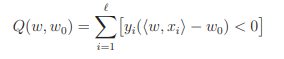

принимает нулевое значение. Но тогда разделяющая гиперплоскость не единственна, поскольку существуют и другие положения разделяющей гиперплоскости, реализующие то же самое разбиение выборки. Идея метода заключается в том, чтобы
разумным образом распорядиться этой свободой выбора. Потребуем, чтобы разделяющая гиперплоскость максимально далеко отстояла от ближайших к ней точек обоих
классов. Первоначально данный принцип классификации возник из эвристических
соображений: вполне естественно полагать, что максимизация зазора (margin) между классами должна способствовать более уверенной классификации. В дальнейшем
этот принцип получил мощное теоретическое обоснование

**Нормировка**. Заметим, что параметры линейного порогового классификатора определены с точностью до нормировки: алгоритм $a(x)$ не изменится, если w и w0 одновременно умножить на одну и ту же положительную константу. Удобно выбрать константу таким образом, чтобы для всех пограничных (т. е. ближайших к разделяющей гиперплоскости) объектов $x_i$ из $X^ℓ$ выполнялись условия:
$$\langle w,x_i⟩ − w_0 = y_i$$

Сделать это возможно, поскольку при оптимальном положении разделяющей гиперплоскости все пограничные объекты находятся от неё на одинаковом расстоянии.
Остальные объекты находятся дальше. Таким образом, для всех $x_i ∈ X^ℓ$

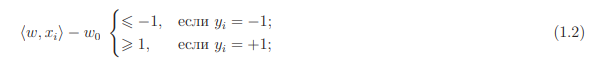

Условие $−1 < \langle w,x ⟩ − w_0 < 1$ задаёт полосу, разделяющую классы. Ни одна из точек обучающей выборки не может лежать внутри этой полосы. Границами полосы
служат две параллельные гиперплоскости с направляющим вектором w. Точки, ближайшие к разделяющей гиперплоскости, лежат в точности на границах полосы. При
этом сама разделяющая гиперплоскость проходит ровно по середине полосы.


**Ширина разделяющей полосы**. Чтобы разделяющая гиперплоскость как можно
дальше отстояла от точек выборки, ширина полосы должна быть максимальной.
Пусть $x_{−}$ и $x_{+}$ — две произвольные точки классов −1 и +1 соответственно, лежащие
на границе полосы. Тогда ширина полосы есть

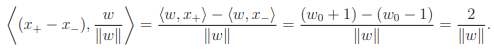

Ширина полосы максимальна, когда норма вектора w минимальна.
Итак, в случае, когда выборка линейно разделима, достаточно простые геометрические соображения приводят к следующей задаче: требуется найти такие значения параметров w и w0, при которых норма вектора w минимальна при условии (1.2). Это задача квадратичного программирования. Она будет подробно рассмотрена в следующем разделе. Затем будет сделано обобщение на тот случай, когда
линейной разделимости нет

### Линейно разделимая выборка

Построение оптимальной разделяющей гиперплоскости сводится к минимизации квадратичной формы при $ℓ$ ограничениях-неравенствах вида (1.2) относительно $n + 1$ переменных $w, w_0$:


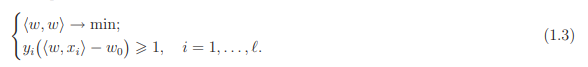

По теореме Куна-Таккера эта задача эквивалентна двойственной задаче поиска
седловой точки функции Лагранжа:

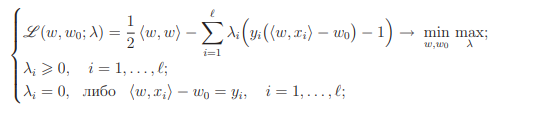